In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#By running this extra command, we won't need to explicitly call plt.show()

## Loading the Dataset

In [4]:
boston_df = pd.read_csv('/Users/hp India/Boston.csv')
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



 Variables in order:
 
 
 **CRIM** -    per capita crime rate by town
 
 **ZN**  -    proportion of residential land zoned for lots over 25,000 sq.ft.
 
 **INDUS** -   proportion of non-retail business acres per town
 
 **CHAS** -    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 **NOX** -     nitric oxides concentration (parts per 10 million)
 
 **RM**  -     average number of rooms per dwelling
 
 **AGE** -      proportion of owner-occupied units built prior to 1940
 
 **DIS**  -    weighted distances to five Boston employment centres
 
 **RAD** -     index of accessibility to radial highways
 
**TAX**  -    full-value property-tax rate per $10k
 
**PTRATIO** -  pupil-teacher ratio by town
 
 **BLACK** -  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 **LSTAT** -   % lower status of the population
 
 **MEDV**  --   Median value of owner-occupied homes in $1000's

The first step towards any machine learning project must be to understand the data. Since the feature names in the dataset is not intuitive, it is essential to know what is the meaning of the corresponding abbrevations.

In [5]:
boston_df.rename(columns = {'medv':'Price'}, inplace = True)
#As MDEV translates to price, it is better to name it to price as it is our target/class label

In [6]:
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
#Checking if the dataset contains some null values or not
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  Price       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


As we can observe, it doesnot contain any null values, nor any missing values. 
NOTE: The reason I chose this dataset is because my aim is to learn deployment of projects, not pre-processing.

In [8]:
boston_df.columns
#We will remove Unnamed: 0 column

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'Price'],
      dtype='object')

In [9]:
boston_df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
#Statistics on the Data
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
Price      0
dtype: int64

# Exploratory Data Analysis

Whenever we have a regression problem, and the features have continuous numerical values, checking their correlation with the output feature is very important

In [13]:
boston_df.corr().Price
#Checking the correlation of different columns with price.
#By default, we use pearson correlation. 0 indicating no correlation, >0 indicating positive correlation & <0 is negative co.

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
Price      1.000000
Name: Price, dtype: float64

As CRIM stands for per capita crime rate for a town, ofcourse it should be negatively correlated. 

In [14]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Here, we have to keep in mind the concept of multicollinearity.  
**If two independent features are highly positively/negatively correlated, we can drop either of them**   
But since no two features are such, we drop none.

Text(0.5, 1.0, 'Negative correlation of 30%')

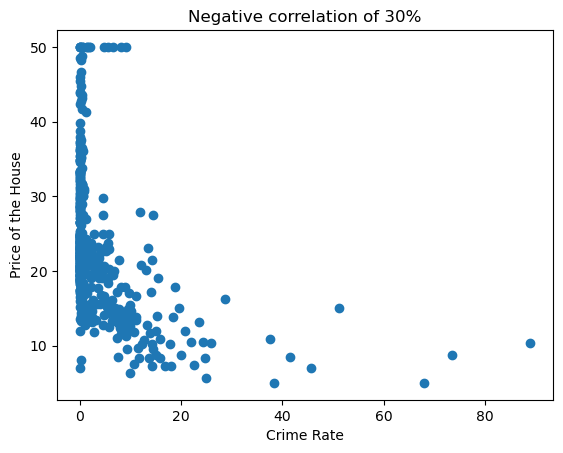

In [15]:
plt.scatter(boston_df.crim, boston_df.Price)
plt.xlabel("Crime Rate")
plt.ylabel("Price of the House")
plt.title("Negative correlation of 30%")

As we can clearly interpret, for places that have crime rate = 0, prices are high, and in different ranges because prices also depend on other features.  
But for places with higher crime rate, the price drops down significantly, showing the negative correlation.

Text(0.5, 1.0, 'Positive Correlation: 70%')

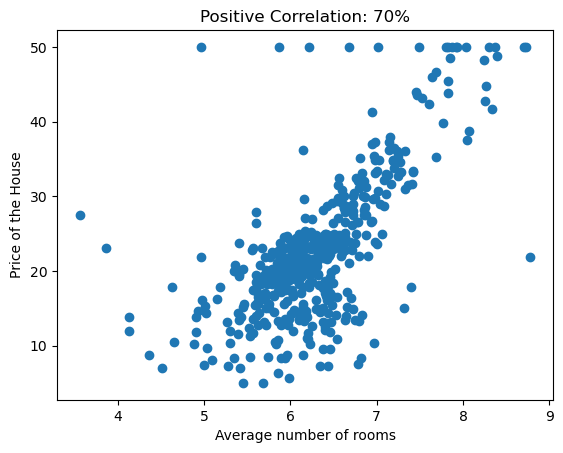

In [16]:
plt.scatter(boston_df.rm, boston_df.Price)
plt.xlabel("Average number of rooms")
plt.ylabel("Price of the House")
plt.title("Positive Correlation: 70%")

As we can witness, number of rooms is highly positively correlated to price of the house

<Axes: xlabel='rm', ylabel='Price'>

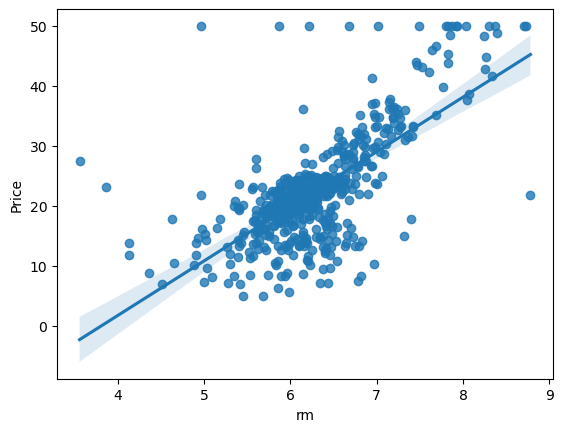

In [17]:
import seaborn as sns
sns.regplot(x='rm', y='Price', data=boston_df)

Text(0.5, 0, 'LSTAT')

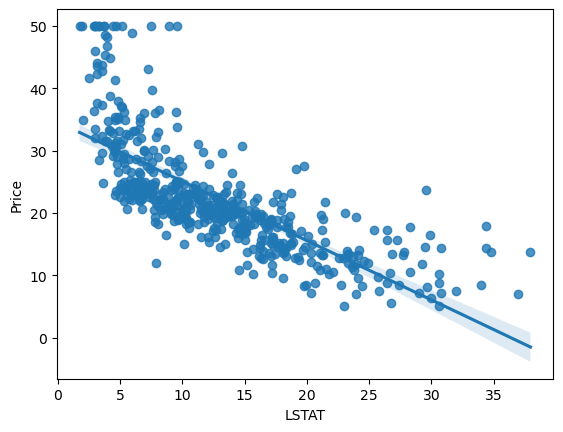

In [18]:
sns.regplot(x='lstat',y='Price', data=boston_df)
plt.xlabel("LSTAT")

Here we draw a very interesting insight from the data. LSTAT stands for percentage of people that come under 'low-status' that is determined by their economic, education status etc. It can be defined as quality of people in that area.  
Here, higher the percentage of low status people in the area, lower is the price of the house

Text(0.5, 1.0, 'Correlation is 10%')

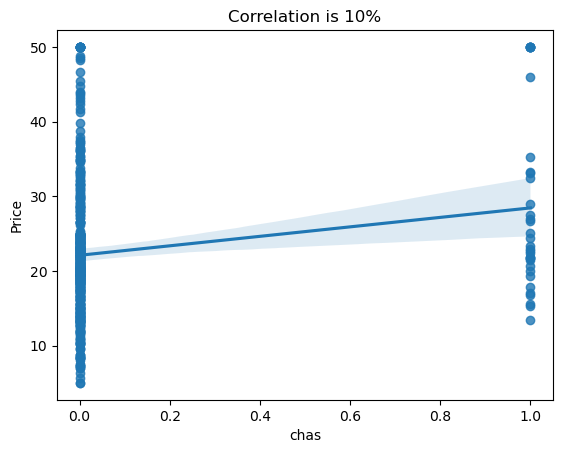

In [19]:
sns.regplot(x='chas', y='Price', data=boston_df)
#AS we can see, on increasing CHAS, there is no significant difference in Price, hence they are uncorrelated
plt.title("Correlation is 10%")

<Axes: xlabel='ptratio', ylabel='Price'>

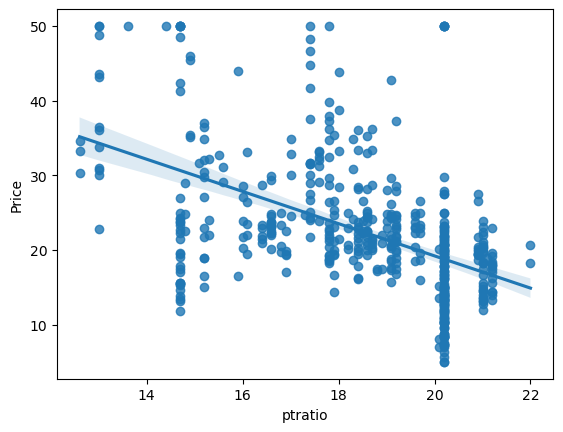

In [20]:
sns.regplot(x='ptratio',y='Price', data=boston_df)

PTRATIO is basically for a given teacher, how many students come under them. Student to teacher ratio. Lower the ratio means a student can get more private attention.  
Hence we witness a negative correlation between teacher-student ratio and the corresponding price

## Preparing the dataset to feed to the Model

The input features are my independent features, and Price (The class label) is my dependent feature that I have to predict.

In [21]:
X = boston_df.iloc[:,:-1]
#This translates to selecting all the rows, and all the columns except the last column

In [22]:
y = boston_df.iloc[:,-1]

In [139]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [23]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [29]:
import sklearn

In [30]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [160]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


#### A very important step in regression is to standardize/normalize the values of the features so that we reduce the risk of outliers and features with bigger scales donot dominate in the regresssion model

In [161]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [162]:
X_train = scaler.fit_transform(X_train)
X_train[5]

array([ 0.12909721, -0.50512499,  1.00549958, -0.28154625,  1.82411437,
        0.10070766,  0.69500122, -0.5876864 ,  1.68782492,  1.5572945 ,
        0.8528718 ,  0.17117355, -0.65205604])

In [163]:

X_test=scaler.transform(X_test)

In [196]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

 # Training the Model

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
my_model = LinearRegression()

In [166]:
my_model.fit(X_train,y_train)

LinearRegression()

In [167]:
#Print the slopes of the hyperplane and the bias
print(my_model.coef_)
print(my_model.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903955


## Evaluating the model

In [168]:
y_pred = my_model.predict(X_test)

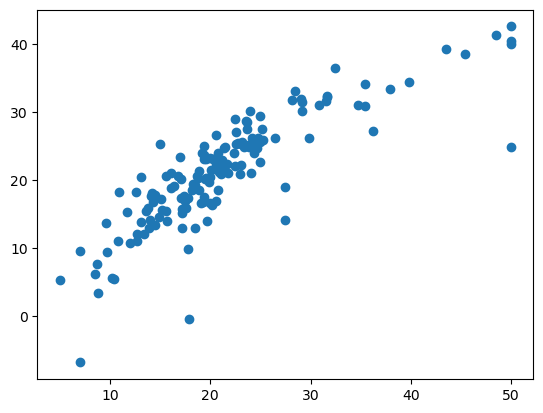

In [169]:
plt.scatter(y_test,y_pred)

In [179]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y_test, y_pred)

# uncomment following line to see the validation_mae
print(val_mae)


3.1627098714574053


In [171]:
residuals = y_test - y_pred

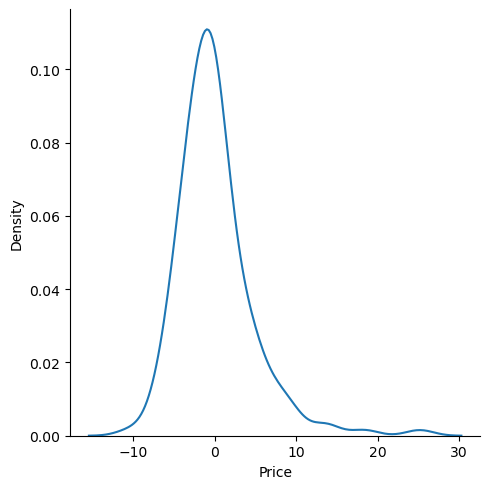

In [172]:
sns.displot(residuals,kind='kde')

## predicting a specific datapoint

In [180]:
new_data = boston_df.iloc[:1,:-1]
new_row=np.array(new_data)
new_row

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [184]:
#standardizing the datapoint
standardized_row = scaler.transform(new_row)

C:\Users\hp India\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [185]:
my_model.predict(standardized_row)

array([30.08649576])

# Pickling the Model File for Deployment

In [191]:
import pickle

In [187]:
pickle.dump(my_model, open("regression_model.pkl", "wb"))


In [188]:
pickled_model = pickle.load(open("regression_model.pkl", 'rb'))

In [190]:
pickled_model.predict(scaler.transform(boston_df.iloc[:1,:-1]))

array([30.08649576])

In [195]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
